___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [ ]:
X_train[6].shape

(28, 28)

In [ ]:
X_train[6]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

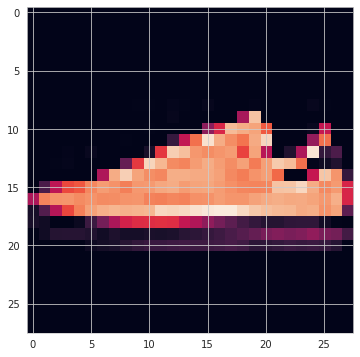

In [ ]:
plt.imshow(X_train[6])
# plt.matshow(X_train[6])

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
y_train[6]

7

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [ ]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

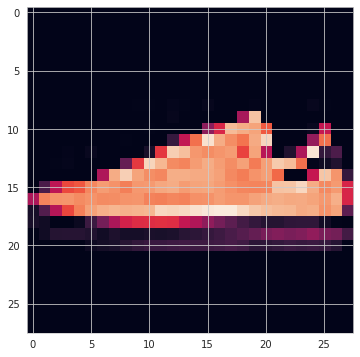

In [ ]:
plt.imshow(X_train[6])

In [ ]:
y_train[6]

7

In [ ]:
classes[int(y_train[6])]

'Sneaker'

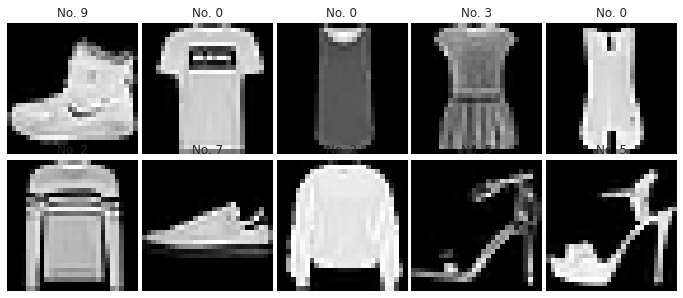

In [ ]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
       
        
plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [ ]:
X_train[6].min()

0

In [ ]:
X_train[6].max()

255

In [ ]:
X_train = X_train.astype('float32')    # 0 ile 1 arasında olacak şekilde normalize ediyorum.
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
X_train[6].min()

0.0

In [ ]:
X_train[6].max()  # normalize ettikten sonraki değer 255 değil, 1 değeri olduğunu görüyoruz.

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_train.reshape(60000, 28, 28, 1).shape   # channel sayısını belirlemiş olmam gerekiyor. işlem yapmıyor. 

(60000, 28, 28, 1)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
X_train.shape, X_test.shape    # 4 dimension, single channel....renkli resim değil. o zaman 3 katman olurdu.

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [ ]:
from tensorflow.keras.utils import to_categorical  # int. sayıları kategoriye ceviriyoruz...one  code encoding yapacağız.

In [ ]:
Y_train = to_categorical(y_train, 10)  # 000010000, 001000000 gibi. 10 tane rakam olduğu için 10 değerini kullandık.
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [ ]:
y_train[6]

7

In [ ]:
Y_train[6]    # one code encoding yapıldığını aşağıda görüyoruz. 7. sıradaki image 1 olarak görülüyor.

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout,BatchNormalization  # öncesinde  hepsini import ediyorum.

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

# Modelling-1

In [ ]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) 
model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) 
model.add(MaxPool2D(pool_size=(2, 2))) 


model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2))) 


model.add(Flatten())          # Dropout un kullanımına dikkat etmek gerekiyor. 0.2, 0.3 , 0.5  çok fark ettirebiliyor. sonraki örneklerde bu durumu açıklayalım. 

model.add(Dense(128, activation='relu'))  # dropout u 0.1 den 0.5 yapınca modelim daha kötü sonuçlar verdi. tekrar 0.1 e  indirdim.!!!!!!!!!!
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu')) # daha önce 128 idi. 256 yaptım. 
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))   # en son du durumda harika sonuç aldım.diğer denemelerimde facia sonuçlar vardı.
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 28)        7084      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 28)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 28)        7084      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 28)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 700)              

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights = True)

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=30, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/30
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5481 - accuracy: 0.8034 - val_loss: 0.4156 - val_accuracy: 0.8509
Epoch 2/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3431 - accuracy: 0.8817 - val_loss: 0.3437 - val_accuracy: 0.8789
Epoch 3/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3087 - accuracy: 0.8950 - val_loss: 0.2982 - val_accuracy: 0.8954
Epoch 4/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2941 - accuracy: 0.9020 - val_loss: 0.2996 - val_accuracy: 0.8950
Epoch 5/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2935 - accuracy: 0.9021 - val_loss: 0.3152 - val_accuracy: 0.8948
Epoch 6/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2978 - accuracy: 0.9026 - val_loss: 0.3197 - val_accuracy: 0.8900
Epoch 7/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3122 - accuracy: 0.8995 - val_loss: 0.3368 - val_ac

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.548,0.803,0.416,0.851
1,0.343,0.882,0.344,0.879
2,0.309,0.895,0.298,0.895
3,0.294,0.902,0.300,0.895
4,0.293,0.902,0.315,0.895


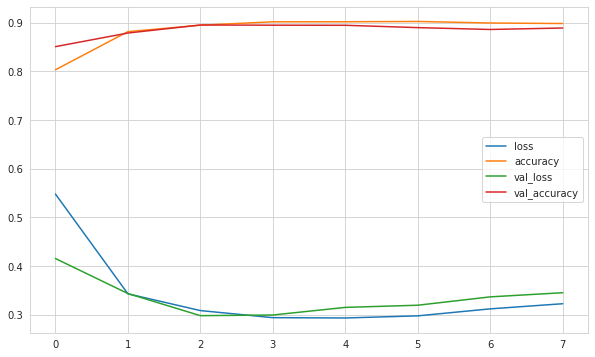

In [ ]:
summary.plot();

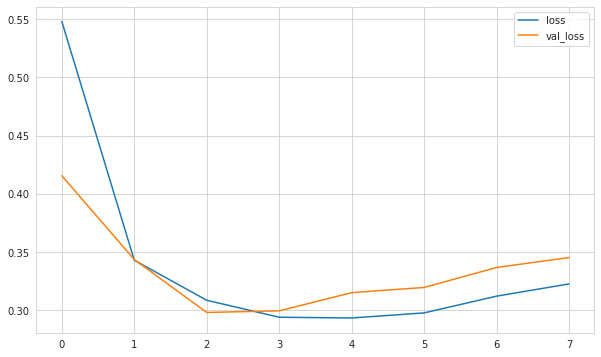

In [ ]:
summary[["loss", "val_loss"]].plot();

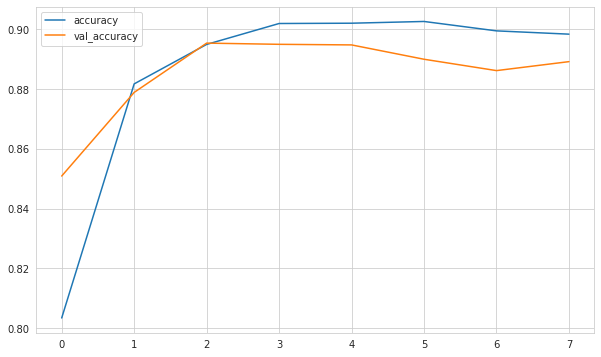

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2982 - accuracy: 0.8954


[0.2982064187526703, 0.8953999876976013]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2982064187526703
Test accuracy: 0.8953999876976013


In [ ]:
pred_prob = model.predict(X_test)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)

In [ ]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.85      0.84      0.85      1000
           3       0.85      0.93      0.89      1000
           4       0.87      0.79      0.83      1000
           5       0.98      0.97      0.98      1000
           6       0.70      0.66      0.68      1000
           7       0.95      0.96      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.90      0.89     10000



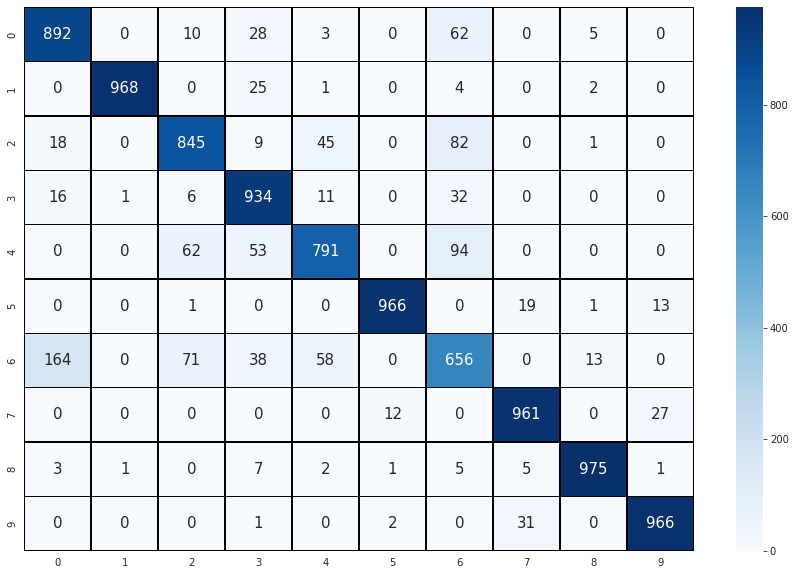

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

# Modelling-2

In [ ]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size, padding = valid
                            # bu bölümde dropout u yüksek vermek işe yaramadı hatta vermesem daha bile iyi oluyor. bu durumu data sayısnın az olmasına bagladım. 
                           # tabi ne kadar dogru göreceğiz.

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) 
model.add(MaxPool2D(pool_size=(2, 2)))    #padding ve stride kavramlarını anlamadığımı gördüm. modelde nasıl bır değişim yaratıyor. hangi durumlarda işe yarar.????
# buraya ve yukarıya koyduğum dropoutu kaldırdım. böyle kesinlikle daha iyi oldu. ancak flatten bölümünde düşük vermek işe yaradı.

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 conv2d_19 (Conv2D)          (None, 24, 24, 28)        7084      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 28)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 10, 10, 28)        7084      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 28)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 700)              

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=40, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5477 - accuracy: 0.8007 - val_loss: 0.3824 - val_accuracy: 0.8685
Epoch 2/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3430 - accuracy: 0.8830 - val_loss: 0.3169 - val_accuracy: 0.8941
Epoch 3/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3084 - accuracy: 0.8954 - val_loss: 0.3475 - val_accuracy: 0.8819
Epoch 4/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2980 - accuracy: 0.9001 - val_loss: 0.3181 - val_accuracy: 0.8931
Epoch 5/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2916 - accuracy: 0.9033 - val_loss: 0.2949 - val_accuracy: 0.8956
Epoch 6/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2993 - accuracy: 0.9024 - val_loss: 0.3220 - val_accuracy: 0.8869
Epoch 7/40
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3078 - accuracy: 0.9018 - val_loss: 0.3164 - val_ac

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.548,0.801,0.382,0.868
1,0.343,0.883,0.317,0.894
2,0.308,0.895,0.347,0.882
3,0.298,0.900,0.318,0.893
4,0.292,0.903,0.295,0.896


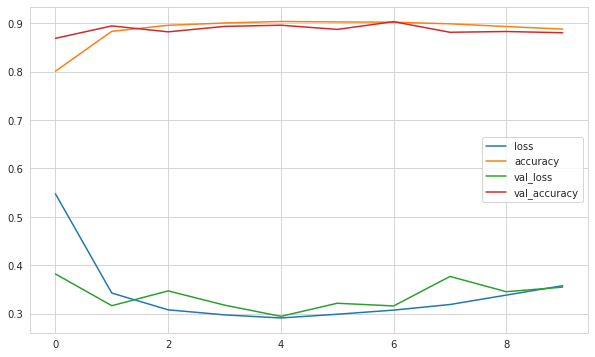

In [ ]:
summary.plot();

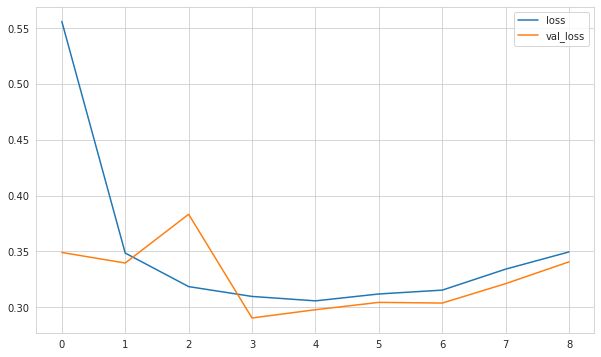

In [ ]:
summary[["loss", "val_loss"]].plot();

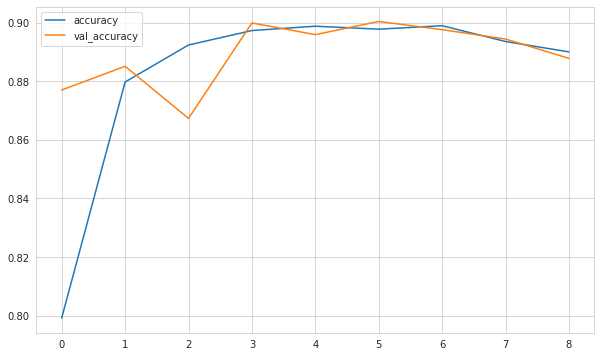

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data¶

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2949 - accuracy: 0.8956


[0.2949488162994385, 0.8956000208854675]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3033515512943268
Test accuracy: 0.8968999981880188


In [ ]:
pred_prob = model.predict(X_test)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)

In [ ]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.83      0.87      0.85      1000
           3       0.89      0.90      0.89      1000
           4       0.78      0.91      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.81      0.56      0.66      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.90      0.89     10000



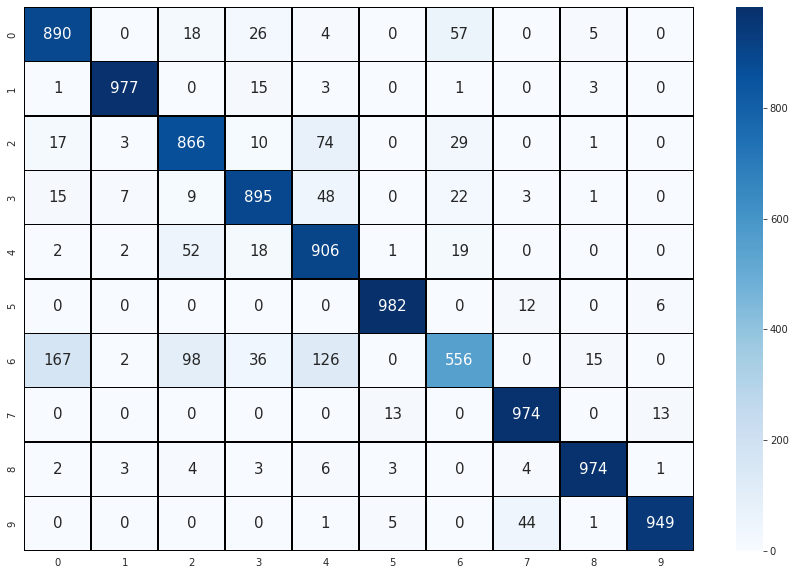

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

# Modelling-3

In [ ]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2))) 
model.add(Dropout(0.1))

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2))) 
model.add(Dropout(0.1))

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 28)       112       
 ormalization)                                                   
                                                                 
 conv2d_22 (Conv2D)          (None, 24, 24, 28)        7084      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 28)       112       
 hNormalization)                                                 
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 28)       0         
 g2D)                                                            
                                                      

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])



Epoch 1/50
1875/1875 [==============================] - 20s 9ms/step - loss: 0.6761 - accuracy: 0.7621 - val_loss: 0.4359 - val_accuracy: 0.8429
Epoch 2/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4370 - accuracy: 0.8499 - val_loss: 0.3359 - val_accuracy: 0.8847
Epoch 3/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3854 - accuracy: 0.8680 - val_loss: 0.3153 - val_accuracy: 0.8878
Epoch 4/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3542 - accuracy: 0.8780 - val_loss: 0.3067 - val_accuracy: 0.8903
Epoch 5/50
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3364 - accuracy: 0.8838 - val_loss: 0.3039 - val_accuracy: 0.8914
Epoch 6/50
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3176 - accuracy: 0.8901 - val_loss: 0.2929 - val_accuracy: 0.8997
Epoch 7/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3096 - accuracy: 0.8941 - val_loss: 0.2669 - val_ac

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()



,loss,accuracy,val_loss,val_accuracy
0,0.676,0.762,0.436,0.843
1,0.437,0.850,0.336,0.885
2,0.385,0.868,0.315,0.888
3,0.354,0.878,0.307,0.890
4,0.336,0.884,0.304,0.891


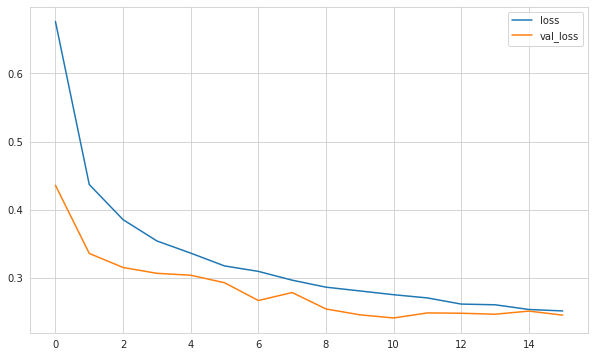

In [ ]:
summary[["loss", "val_loss"]].plot();



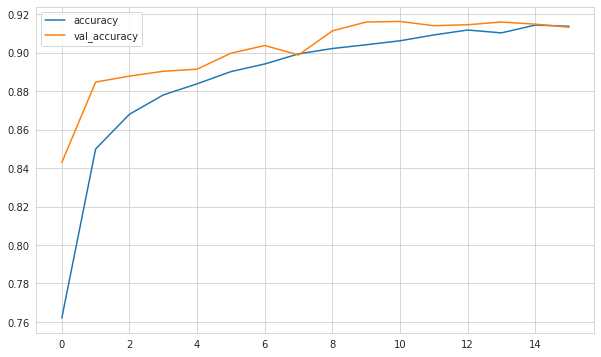

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data¶

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2413 - accuracy: 0.9162


[0.2412518858909607, 0.9161999821662903]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2412518858909607
Test accuracy: 0.9161999821662903


In [ ]:
pred_prob = model.predict(X_test)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)

In [ ]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.89      0.87      1000
           3       0.92      0.91      0.92      1000
           4       0.86      0.87      0.86      1000
           5       0.99      0.99      0.99      1000
           6       0.77      0.72      0.75      1000
           7       0.96      0.98      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



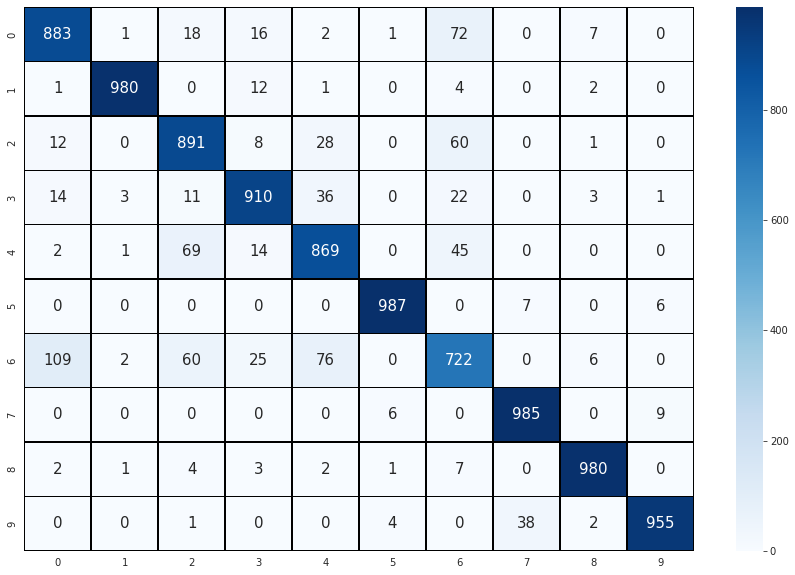

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

# Modelling-4

In [ ]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2))) 
model.add(Dropout(0.1))

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2))) 
model.add(Dropout(0.1))

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 batch_normalization_10 (Bat  (None, 26, 26, 28)       112       
 chNormalization)                                                
                                                                 
 conv2d_27 (Conv2D)          (None, 24, 24, 28)        7084      
                                                                 
 batch_normalization_11 (Bat  (None, 24, 24, 28)       112       
 chNormalization)                                                
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 12, 12, 28)       0         
 g2D)                                                            
                                                      

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])



Epoch 1/50
1875/1875 [==============================] - 19s 9ms/step - loss: 0.6928 - accuracy: 0.7590 - val_loss: 0.4606 - val_accuracy: 0.8373
Epoch 2/50
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4367 - accuracy: 0.8495 - val_loss: 0.3424 - val_accuracy: 0.8801
Epoch 3/50
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3817 - accuracy: 0.8694 - val_loss: 0.3153 - val_accuracy: 0.8864
Epoch 4/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3538 - accuracy: 0.8792 - val_loss: 0.3047 - val_accuracy: 0.8894
Epoch 5/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3320 - accuracy: 0.8868 - val_loss: 0.2987 - val_accuracy: 0.8923
Epoch 6/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3165 - accuracy: 0.8918 - val_loss: 0.2795 - val_accuracy: 0.8992
Epoch 7/50
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3016 - accuracy: 0.8978 - val_loss: 0.2575 - val_ac

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()



,loss,accuracy,val_loss,val_accuracy
0,0.693,0.759,0.461,0.837
1,0.437,0.850,0.342,0.880
2,0.382,0.869,0.315,0.886
3,0.354,0.879,0.305,0.889
4,0.332,0.887,0.299,0.892


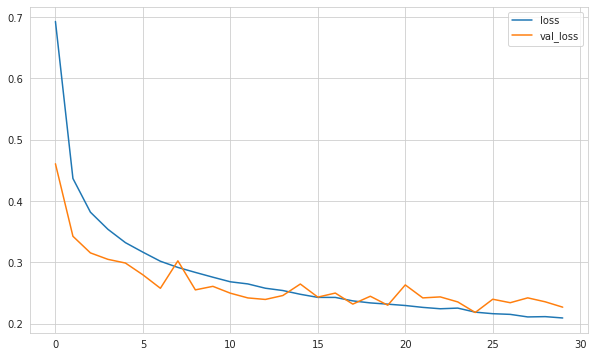

In [ ]:
summary[["loss", "val_loss"]].plot();



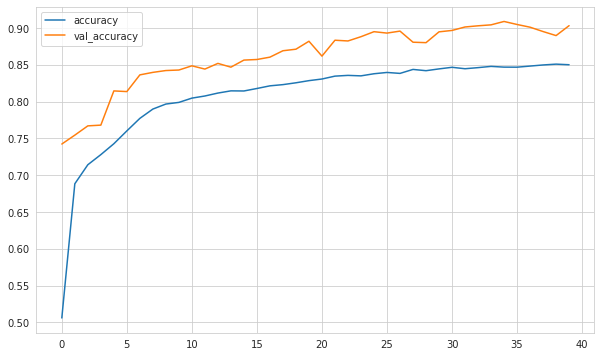

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data¶

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2181 - accuracy: 0.9257


[0.21805907785892487, 0.9257000088691711]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21805907785892487
Test accuracy: 0.9257000088691711


In [ ]:
pred_prob = model.predict(X_test)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)

In [ ]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1000
           1       0.99      0.99      0.99      1000
           2       0.91      0.89      0.90      1000
           3       0.89      0.96      0.92      1000
           4       0.90      0.87      0.88      1000
           5       0.99      0.99      0.99      1000
           6       0.77      0.80      0.78      1000
           7       0.95      0.98      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



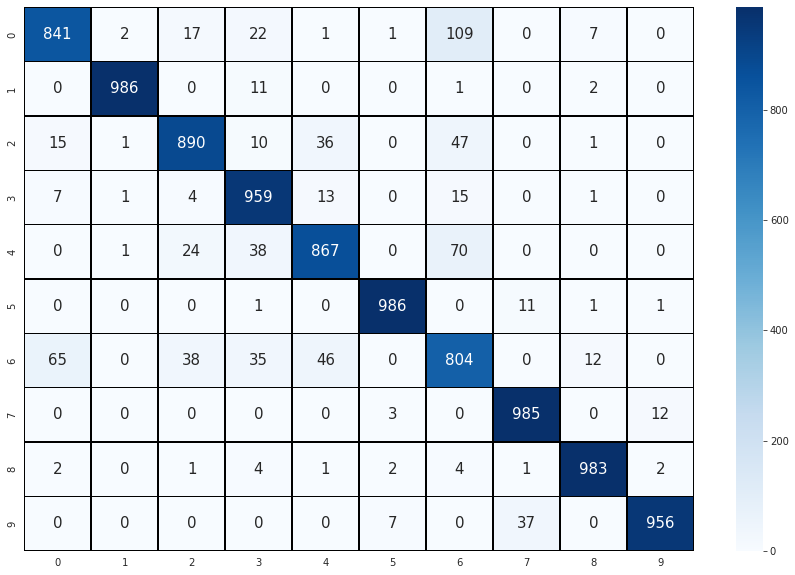

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

## Prediction

In [ ]:
my_image = X_test[6]

In [ ]:
my_image.shape

(28, 28, 1)

In [ ]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))

In [ ]:
image_prediction

array([[1.0380067e-04, 1.9629861e-05, 1.8341295e-02, 1.6633530e-05,
        9.7425824e-01, 3.9852708e-05, 7.1703214e-03, 5.9457284e-06,
        2.4501946e-05, 1.9820342e-05]], dtype=float32)

In [ ]:
np.argmax(image_prediction, axis=1)

array([4])

In [ ]:
result=np.argmax(image_prediction, axis=1)

In [ ]:
result

array([4])

In [ ]:
classes[int(result)]

'Coat'

In [ ]:
model.save("Assign_cnn")

INFO:tensorflow:Assets written to: Assign_cnn/assets


In [ ]:
model=tf.keras.models.load_model("Assign_cnn")

In [ ]:
X_test[12].shape

(28, 28, 1)

In [ ]:
pred=model.predict(np.expand_dims(X_test[12],axis=0))

In [ ]:
np.argmax(pred)

7

In [ ]:
#np.expand_dims(X_test[12],axis=0).shape

(1, 28, 28, 1)

In [ ]:
pred=model.predict(np.expand_dims(X_test[12],axis=0))

In [ ]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___